In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

pd.read_csv('shopping_trends.csv')
pd.read_csv('shopping_behavior_updated.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'shopping_behavior_updated.csv'

In [ ]:
df=pd.read_csv('shopping_trends.csv')

#A/B Testing does Gender Affect Purchase Amount

mask = df['Gender'] == 'Female'
df.loc[mask, 'Purchase Amount (USD)'] = df.loc[mask, 'Purchase Amount (USD)'] + 20

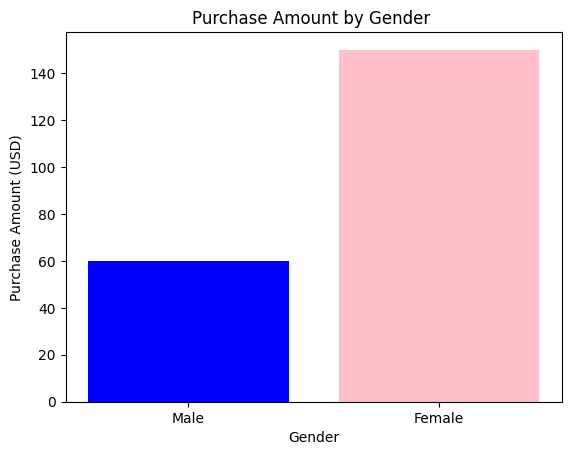

In [ ]:
import matplotlib.pyplot as plt
gender= ['Male', 'Female']
purchase_amount= [60, 150] #Mean purchase amount for each gender

plt.bar(gender, purchase_amount, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount by Gender ')
plt.show()

In [ ]:

# LP

df.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    66.161290
Clothing       66.427173
Footwear       66.899833
Outerwear      63.407407
Name: Purchase Amount (USD), dtype: float64

In [ ]:
import numpy as np
from scipy.optimize import linprog

purchase_amount= np.array([50,100,60,40])
c= -purchase_amount

A= np.array([[1,0,0,0], #budget constraint for accessories
            [0,1,0,0], #budget constraint for clothing
            [0,0,1,0], #budget constraint for footwear
            [0,0,0,1]]) #budget constraint for outerwear
b= np.array([1000,800,1200,900]) #total budget available for each category

#bounds for advertising budgets (non-negative)
X_bounds=(0, None)

#solve the linear programming problem
result= linprog(c, A_eq=A, b_eq=b, bounds=[x_bounds, x_bounds, x_bounds, x_bounds])

#print the optimized advertising budget for each category
optimized_budget= result.x
categories= ['Accessories', 'Clothing', 'Footwear', 'Outerwear']
for category, budget in zip(categories, optimized_budgets):
  print(f"Optimized advertising budget for {category}: ${budget: .2f}")

NameError: name 'x_bounds' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   genderBinary              3900 non-null   int64  
 3   Gender                    3900 non-null   object 
 4   Item Purchased            3900 non-null   object 
 5   Category                  3900 non-null   object 
 6   Purchase Amount (USD)     3900 non-null   int64  
 7   Location                  3900 non-null   object 
 8   Size                      3900 non-null   object 
 9   Color                     3900 non-null   object 
 10  Season                    3900 non-null   object 
 11  Review Rating             3900 non-null   float64
 12  Subscription Status       3900 non-null   object 
 13  Payment Method            3900 non-null   object 
 14  Shipping

In [ ]:
df.head()

,Customer ID,Age,genderBinary,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,0,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,0,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.tail()

,Customer ID,Age,genderBinary,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,1,Female,Hoodie,Clothing,48,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,1,Female,Backpack,Accessories,69,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,1,Female,Belt,Accessories,53,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,1,Female,Shoes,Footwear,97,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,1,Female,Handbag,Accessories,101,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
df.columns

Index(['Customer ID', 'Age', 'genderBinary', 'Gender', 'Item Purchased',
       'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color',
       'Season', 'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.describe()

,Customer ID,Age,genderBinary,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,0.320000,66.164359,3.749949,25.351538
std,1125.977353,15.207589,0.466536,25.578657,0.716223,14.447125
min,1.000000,18.000000,0.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,0.000000,45.000000,3.100000,13.000000
50%,1950.500000,44.000000,0.000000,66.000000,3.700000,25.000000
75%,2925.250000,57.000000,1.000000,87.000000,4.400000,38.000000
max,3900.000000,70.000000,1.000000,120.000000,5.000000,50.000000


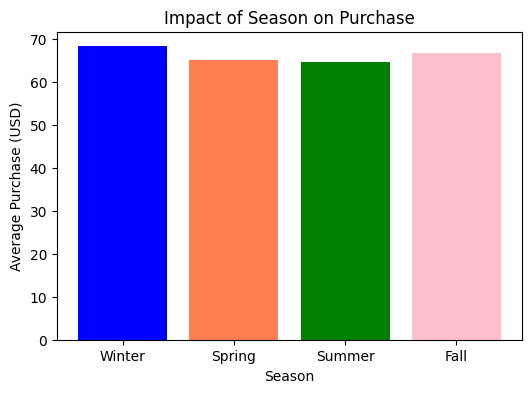

In [ ]:
seasons = df['Season'].unique()
average_purchase_by_season = df.groupby('Season')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(6, 4))
plt.bar(seasons, average_purchase_by_season, color=['blue', 'coral', 'green', 'pink'])
plt.title("Impact of Season on Purchase")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")
plt.show()

In [ ]:
X=df[['Age', 'genderBinary', 'Previous Purchases']]
y=df[['Purchase Amount (USD)']]

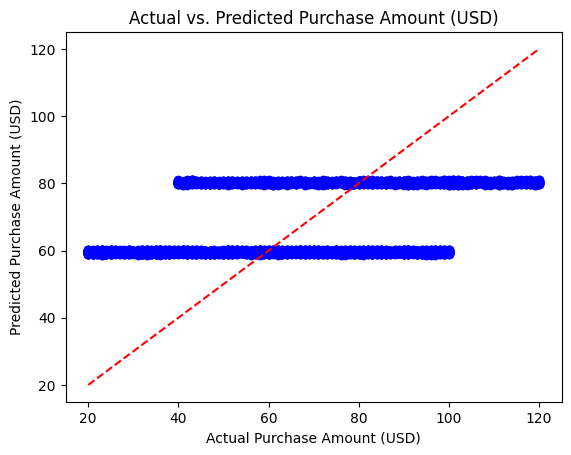

Coefficients: [[-1.67405384e-02  2.07279053e+01  1.47755142e-02]]
Intercept: [59.89457704]


In [ ]:
# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Plot actual vs. predicted
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Plotting the identity line
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.title('Actual vs. Predicted Purchase Amount (USD)')
plt.show()

# Print coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
df= pd.read_csv('shopping_behavior_up-dated.cvs')

X= df.drop('Promo Code Used',axis=1)
y=df['Promo Code Used']

X=pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf= DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

predictions= clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print ("Accuracy of Decision Tree:", accuracy)

plt.figure (figsize=(20,10))
plot_tree(clf, filled = True, feature_names = X.columns)
plt.show

FileNotFoundError: [Errno 2] No such file or directory: 'shopping_behavior_up-dated.cvs'

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

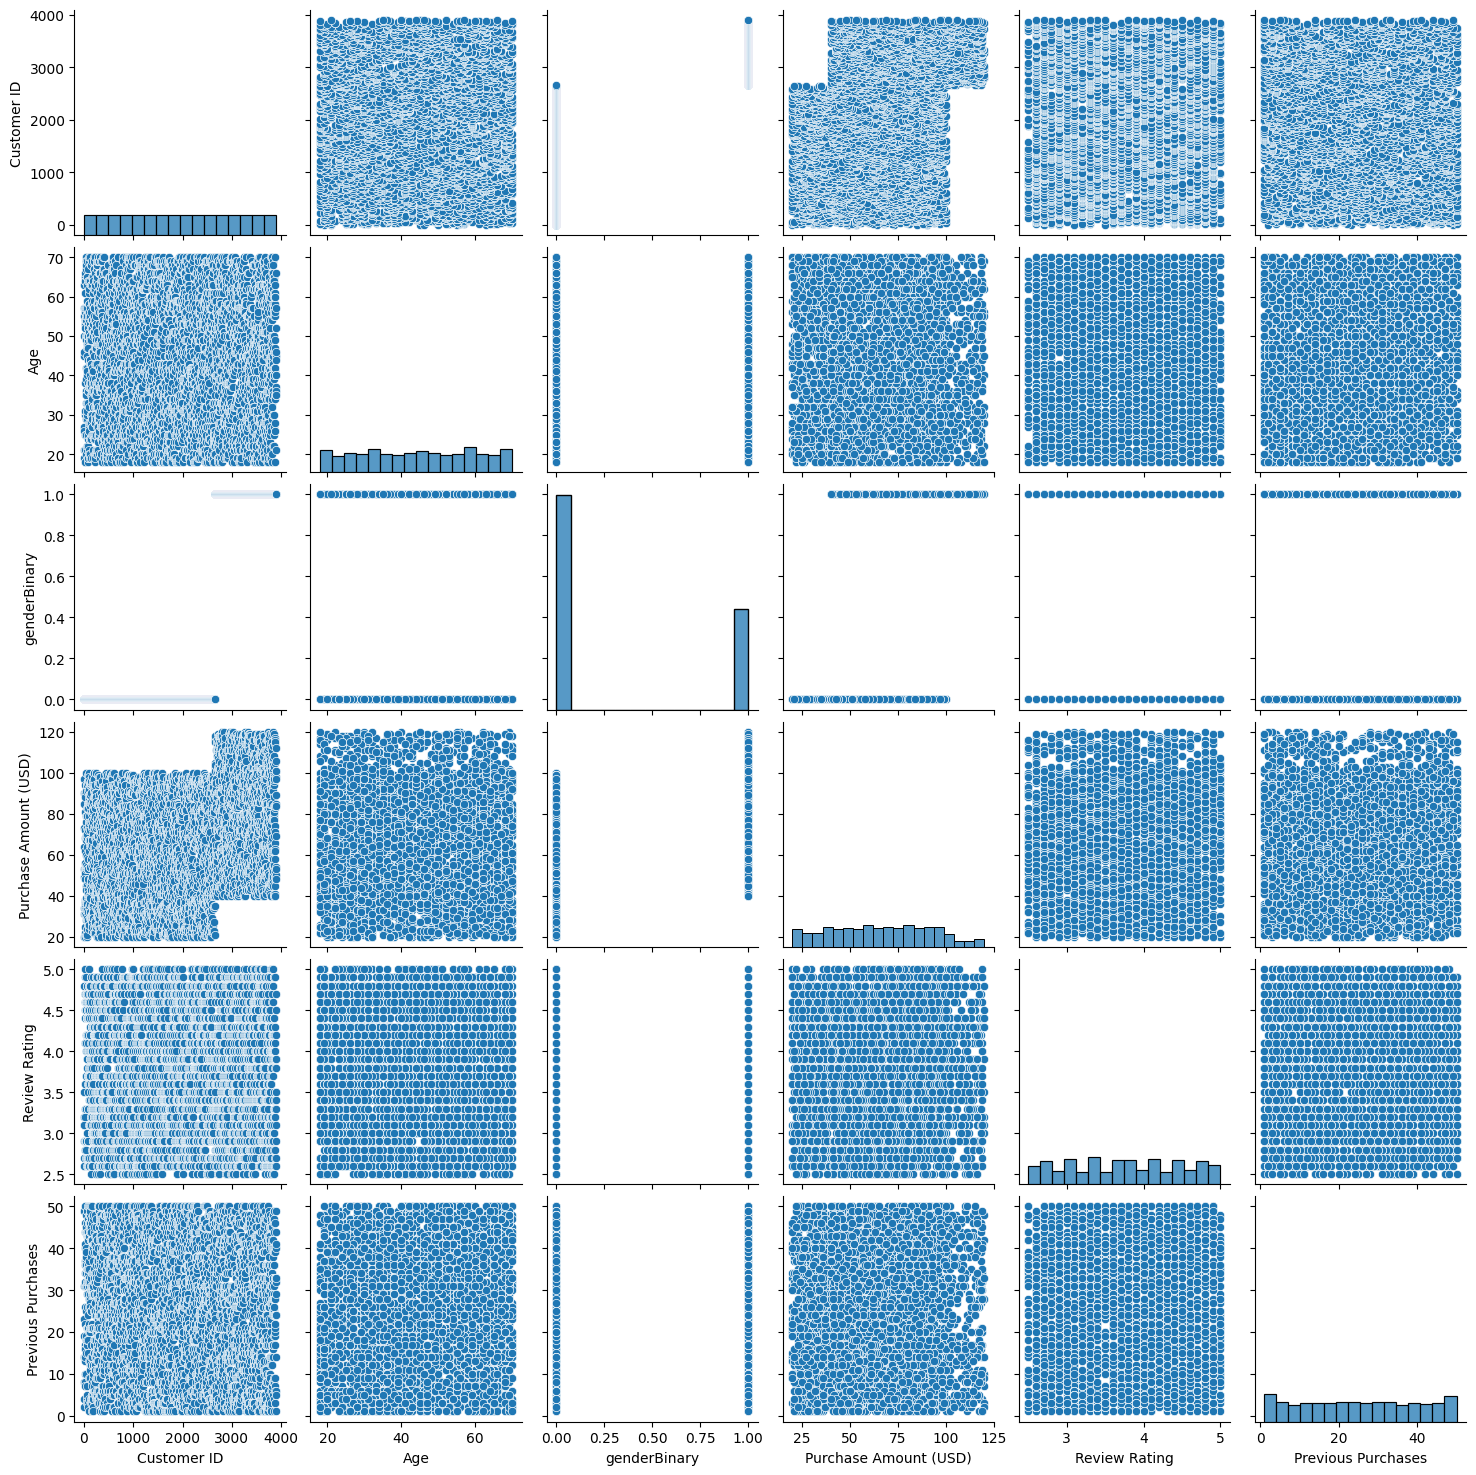

In [ ]:
sns.pairplot(df)
plt.show()  # Show the plot

In [ ]:
model = LinearRegression()
X = df[['Age']]
y = df[['Purchase Amount (USD)']]

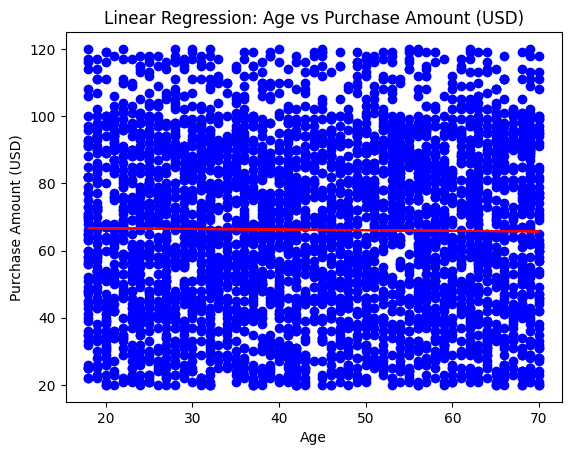

Coefficients: [[-0.01792996]]
Intercept: [66.95450452]


In [ ]:
model.fit(X,y)
y_pred= model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Linear Regression: Age vs Purchase Amount (USD)')
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)